# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [73]:
rotationGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40)

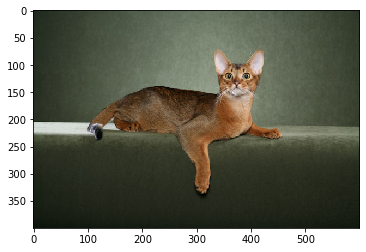

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


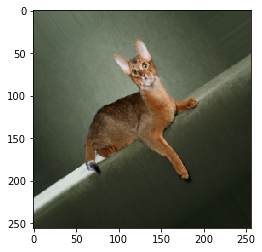

In [4]:
x, y = next(rotationGenerator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [19]:
img=Image.fromarray(x[0].astype('uint8'))
img.save('images/augmented_images_obtained/rotation.jpg','JPEG')


# Task 3: Width and Height Shifts

In [20]:
dimGenerator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=[-100,-50,0,50,100],
                                                           height_shift_range=[-50,0,50])

Found 1 images belonging to 1 classes.


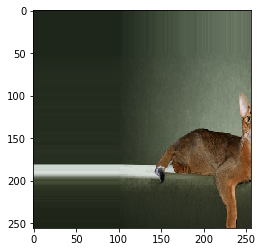

In [38]:
x, y = next(dimGenerator.flow_from_directory('images/train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [39]:
img=Image.fromarray(x[0].astype('uint8'))
img.save('images/augmented_images_obtained/verical&height1.jpg','JPEG')
    

# Task 4: Brightness

Found 3 images belonging to 2 classes.


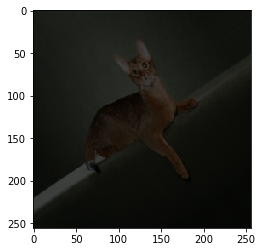

In [43]:
brightnessGenerator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(-2.5,2.))

x, y = next(brightnessGenerator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [44]:
img=Image.fromarray(x[0].astype('uint8'))
img.save('images/augmented_images_obtained/brightness.jpg','JPEG')
    

# Task 5: Shear Transformation

Found 4 images belonging to 2 classes.


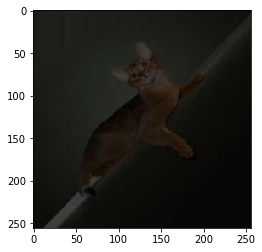

In [46]:
shearGenerator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=40)

x, y = next(shearGenerator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [47]:
img=Image.fromarray(x[0].astype('uint8'))
img.save('images/augmented_images_obtained/shear.jpg','JPEG')
    

# Task 6: Zoom

Found 6 images belonging to 2 classes.


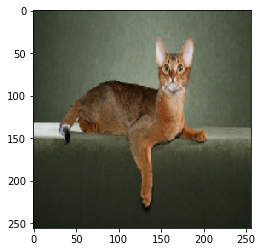

In [58]:
zoomGenerator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5,1.2])

x, y = next(zoomGenerator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [59]:
img=Image.fromarray(x[0].astype('uint8'))
img.save('images/augmented_images_obtained/zoom2.jpg','JPEG')
    

# Task 7: Channel Shift

Found 8 images belonging to 2 classes.


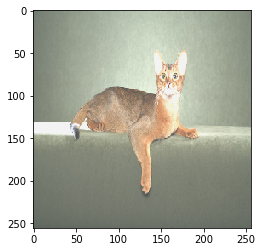

In [69]:
channelGenerator = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range=100)

x, y = next(channelGenerator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [70]:
img=Image.fromarray(x[0].astype('uint8'))
img.save('images/augmented_images_obtained/channel_shift2.jpg','JPEG')
    

# Task 8: Flips

Found 9 images belonging to 2 classes.


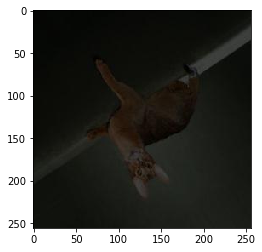

In [71]:
flipGenerator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               vertical_flip=True)

x, y = next(flipGenerator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [72]:
img=Image.fromarray(x[0].astype('uint8'))
img.save('images/augmented_images_obtained/flip.jpg','JPEG')
    

# Task 9: Normalization

### Featurewise

In [76]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#x_mean=x_train.mean()
#x_std=x_train.std()
#x_train_norm=(x_train-x_mean)/x_std
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,featurewise_std_normalization=True
)

generator.fit(x_train)

In [77]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.05168757 0.6518436 [[8]]
120.70756512369792


### Samplewise

In [79]:
generator2 = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,samplewise_std_normalization=True
)

x, y = next(generator2.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[0]]


# Task 10: Rescale and Preprocessing Function

In [80]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [81]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [82]:
print(x.mean(), x.std(), y)

-0.070751615 0.37121058 [[5]]
